Question 1

In [ ]:
import numpy as np
np.random.seed(0)

In [ ]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def my_gradient_descent(alpha,max_its,w):
    # cost for this example
    g = lambda w: 1/50*(w**4 + w**2 + 10*w)
    
    # the gradient function for this example
    # finish the next line of code
    grad = lambda w: 1/50*(4*w**3 + 2*w + 10)

    # run the gradient descent loop
    cost_history = [g(w)]        # container for corresponding cost function history
    for k in range(1,max_its+1):       
        # evaluate the gradient, store current weights and cost function value
        # finish the next line of code
        grad_eval = grad(w)

        # take gradient descent step
        # finish the next line of code
        w = w - alpha * grad_eval
            
        # collect final weights
        cost_history.append(g(w))  
    return cost_history

In [ ]:
# initial point
w = 2.0
max_its = 1000

# first run
alpha = 10**(0)
cost_history_1 = my_gradient_descent(alpha,max_its,w)

alpha = 10**(-1)
cost_history_2 = my_gradient_descent(alpha,max_its,w)

alpha = 10**(-2)
cost_history_3 = my_gradient_descent(alpha,max_its,w)

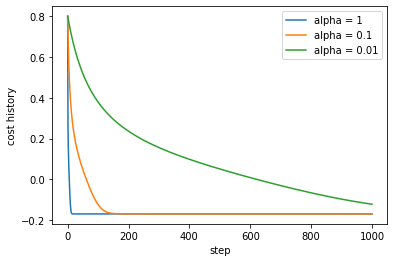

In [ ]:
# plot the above results
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.plot(cost_history_3);
plt.xlabel("step");
plt.ylabel("cost history");
plt.legend(["alpha = 1", "alpha = 0.1", "alpha = 0.01"]);

Answer: 
From the plot, we can see that the smaller step sizes (alpha = 0.1 and alpha = 0.01) converge smoothly to the minimum. From the two smaller step sizes, alpha = 0.01 converges faster than alpha = 0.1. Therefore, in this case, a step size of alpha = 0.01 would work best for this function.

Question 2

In [ ]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        # finish the next line of code
        grad_eval = gradient(w)

        # take gradient descent step
        # finish the next line of code
        w = w - alpha * grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
import autograd.numpy as np
# define g by finish the next line of code
g = lambda w: w[0]**2 + w[1]**2 + 2 * np.sin(1.5 * (w[0] + w[1])) + 2 

In [ ]:
# first run
w = np.array([3.0,3.0]); max_its = 10; 
alpha_choice = 10**(-2);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

# second run
alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

# third run
alpha_choice = 10**(0);
weight_history_3,cost_history_3 = gradient_descent(g,alpha_choice,max_its,w)

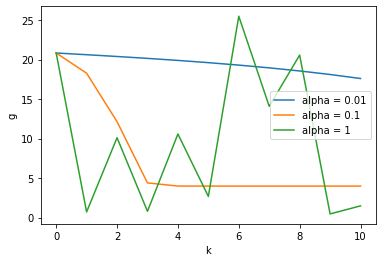

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.plot(cost_history_3);
plt.xlabel("k");
plt.ylabel("g");
plt.legend(["alpha = 0.01", "alpha = 0.1", "alpha = 1"]);

Question 3

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import numpy as np
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w,version):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
            
        if version == 'full':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
        
        # normalize components
        if version == 'component':
            component_norm = np.abs(grad_eval) + 10**(-8)
            grad_eval /= component_norm
            
        if version == 'none':
            grad_eval = grad_eval

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [ ]:
# define function g by finish the next line of code
g = lambda w: np.tanh(4*w[0] + 4*w[1]) + max(1, 0.4*w[0]**2) + 1
w = np.array([1.0,2.0]); max_its = 100; alpha_choice = 10**(-1);

version = 'none'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)
version = 'full'
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w,version)

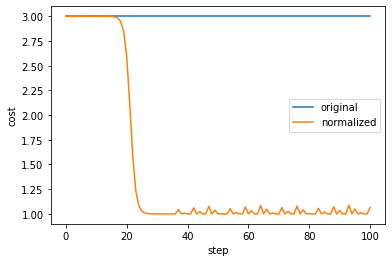

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.xlabel("step");
plt.ylabel("cost");
plt.legend(["original", "normalized"]);

Question 4

In [ ]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [ ]:
# define function g by finishing the next line of code
g = lambda w: (1/50)*(w[0]**4 + w[0]**2 + 10*w[0])

w = np.array([2.5]); max_its = 10;
weight_history,cost_history = newtons_method(g,max_its,w)

# run gradient descent 
max_its = 10; alpha_choice = "diminishing";
version = 'none'
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w,version)

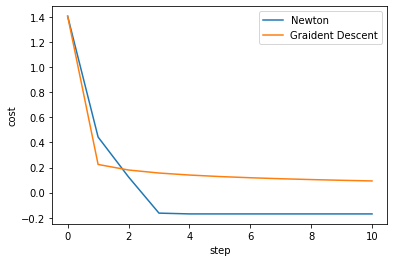

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.plot(cost_history_1);
plt.xlabel("step");
plt.ylabel("cost");
plt.legend(["Newton", "Graident Descent"]);


Question 5

Answer:

To set up the relevant cost function that was minimized to obtain the square root of 999, we can define the cost function J(w) as follows.

J(w) = (g(w) - sqrt(999))**2

Here, we compute the squared difference between the value of the function g(w) and the value we want to approximate (square root of 999). The goal of the optimization problem is to find the value of w that minimizes this cost function.

Then we can apply the iterative formula for Newton's method to this cost function by finding its first and second derivatives. 
To confirm, we can plug this value into the original function g(w) and check if the result is close to the value of the square root of 999.

In [ ]:
# define function
g = lambda w: w**2 - 999
# define the function we want to minimize so that we will find the root of g(w)= w^2 - 999
w_init = np.sqrt(999)
C = (1/3)*w_init**3 - 999*w_init

# finish the next line of code
f = lambda w: (1/3)*w**3 - 999*w + C 


In [ ]:
w_init = np.random.randn(1)
max_its = 10
epsilon = 1
weight_history,cost_history = newtons_method(f,max_its,w_init,epsilon=epsilon)

In [ ]:
print (weight_history[-1])

[31.60696126]


In [ ]:
weight_history[-1]**2

array([999.00000008])